<h3>
<b>NAME:</B> R AKHILANDESHWARI<BR>
<B>REG NO:</B> 2048046<BR>
</H3>

<H1><CENTER><U><B>MDS173 LAB TEST 3</U></B></CENTER></H1>

In [ ]:
#importing the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Creating the random array of size 1000*4.  
data = np.random.rand(1000,4)
data

array([[0.9743176 , 0.4063235 , 0.38306256, 0.39878827],
       [0.92652783, 0.9007994 , 0.45766226, 0.91243837],
       [0.65035067, 0.80375938, 0.61421305, 0.15979313],
       ...,
       [0.88416561, 0.72048173, 0.53590083, 0.4433007 ],
       [0.09605931, 0.27934907, 0.49465082, 0.43404967],
       [0.12808069, 0.91833033, 0.57763148, 0.34990254]])

In [ ]:
#Converting the created array to the dataframe
Cdata=pd.DataFrame(data,columns=['S1','S2','S3','S4'])   
Cdata

,S1,S2,S3,S4
0,0.974318,0.406324,0.383063,0.398788
1,0.926528,0.900799,0.457662,0.912438
2,0.650351,0.803759,0.614213,0.159793
3,0.753904,0.754208,0.420711,0.312354
4,0.472105,0.009138,0.163641,0.642831
...,...,...,...,...
995,0.127144,0.641441,0.558485,0.837720
996,0.493255,0.978334,0.982228,0.602923
997,0.884166,0.720482,0.535901,0.443301
998,0.096059,0.279349,0.494651,0.434050


In [ ]:
#Finding the present date
from datetime import date 
today=date.today() 
print(today) 

2020-12-17


In [ ]:
#Creating the range of date from 2015-01-01 to 2020-12-17 and assigning it to the created dataframe Cdata.
ptime=pd.date_range(start="2015-01-01",end=today,periods=1000).to_list()
Cdata=Cdata.assign(Time= ptime)
Cdata

,S1,S2,S3,S4,Time
0,0.974318,0.406324,0.383063,0.398788,2015-01-01 00:00:00.000000000
1,0.926528,0.900799,0.457662,0.912438,2015-01-03 04:18:01.081081081
2,0.650351,0.803759,0.614213,0.159793,2015-01-05 08:36:02.162162162
3,0.753904,0.754208,0.420711,0.312354,2015-01-07 12:54:03.243243243
4,0.472105,0.009138,0.163641,0.642831,2015-01-09 17:12:04.324324324
...,...,...,...,...,...
995,0.127144,0.641441,0.558485,0.837720,2020-12-08 06:47:55.675675680
996,0.493255,0.978334,0.982228,0.602923,2020-12-10 11:05:56.756756768
997,0.884166,0.720482,0.535901,0.443301,2020-12-12 15:23:57.837837856
998,0.096059,0.279349,0.494651,0.434050,2020-12-14 19:41:58.918918944


In [ ]:
#Setting the index value as the Time Column.
Cdata.set_index("Time",inplace=True)
Cdata.tail()

,S1,S2,S3,S4
Time,,,,
2020-12-08 06:47:55.675675680,0.127144,0.641441,0.558485,0.837720
2020-12-10 11:05:56.756756768,0.493255,0.978334,0.982228,0.602923
2020-12-12 15:23:57.837837856,0.884166,0.720482,0.535901,0.443301
2020-12-14 19:41:58.918918944,0.096059,0.279349,0.494651,0.434050
2020-12-17 00:00:00.000000000,0.128081,0.918330,0.577631,0.349903


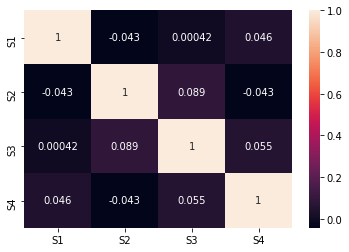

In [ ]:
sns.heatmap(Cdata.corr('pearson'),annot=True)

From the above heatmap which depicts the correlation, I found the following results-

The <b>S1</b> is negatively correlated to S2, and weakly correlated to S3. But is normally correlated to S4.

The <b>S2</b> is negatively correlated to S1 and S4. But it is positively correlated to S3.

The <b>S3</b> is positively is correlated to S1,S2,S4. But it is strongly correlated to S2. 

The <b>S4</b> is negatively correlated to S2. But it is positively correlated to S1 and S3. 

From the aove correlation, we can say that the correlation between S2 and S3 is high compare with its correlation with others. So, lets perform time series analysis between S2 and S3.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6ca0717b8>,
      dtype=object)

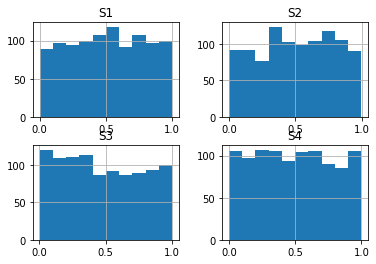

In [ ]:
Cdata.hist()

The S1 is normally distributed.

The S2 is right skewed.

The S3 is left skewed.

The S4 is distributed evenly.

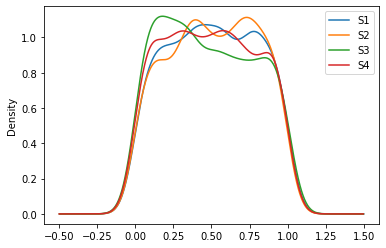

In [ ]:
#Finding the relation between all the S's
Cdata.plot(kind='kde')

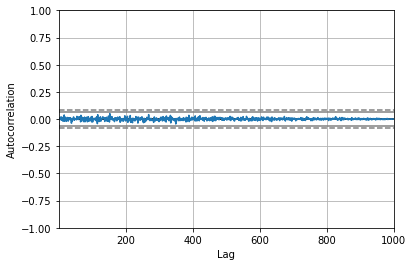

In [ ]:
#Finding the autocorrelation
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(Cdata)

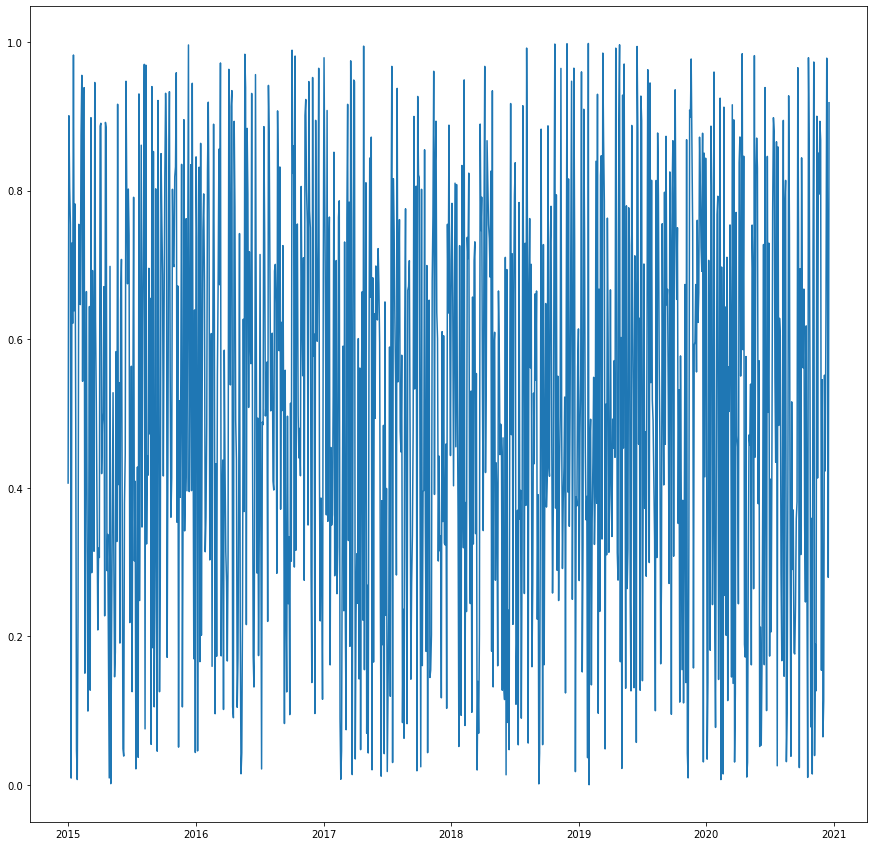

In [ ]:
#Plotting the S2
plt.figure(figsize=(15,15))
plt.plot(Cdata.S2)
plt.show()

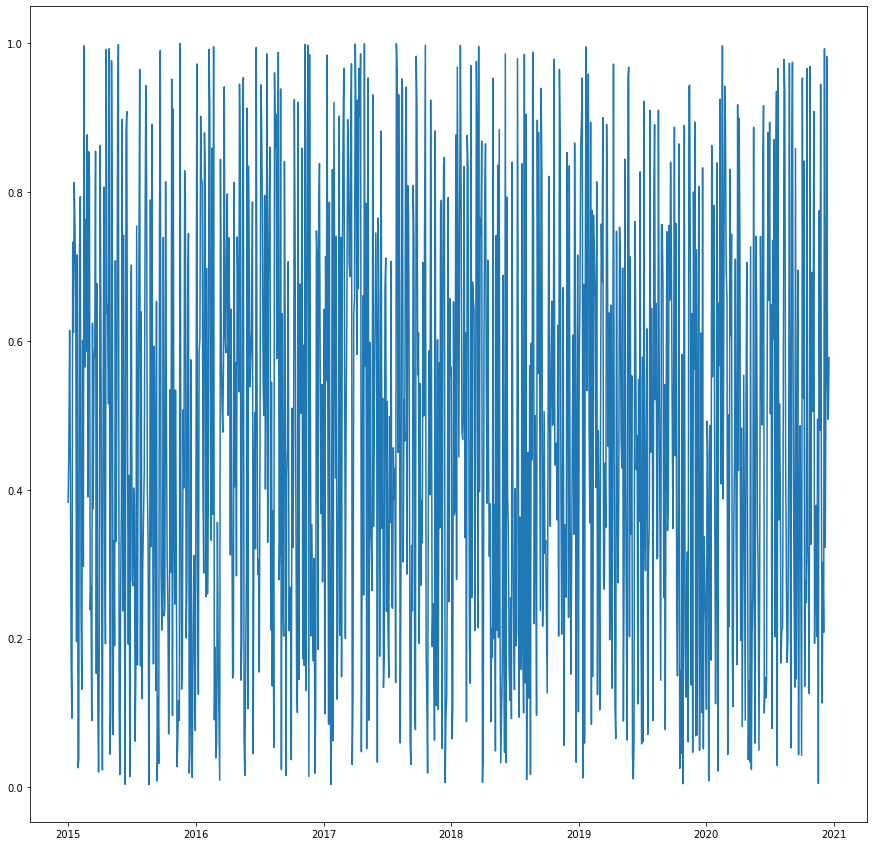

In [ ]:
#Plotting the S3
plt.figure(figsize=(15,15))
plt.plot(Cdata.S3)
plt.show()

From the above two plots we can roughly say that both S2 and S3 are distributed similarly, but we cannot trust on the visualization. Because based on the distribution plot, we got the S2 is skwewed right whereas the S3 is skewed left.

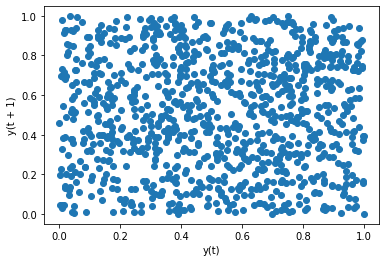

In [ ]:
from pandas.plotting import lag_plot
lag_plot(Cdata[['S2']])

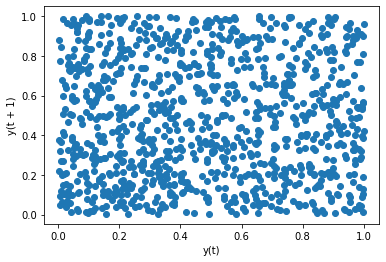

In [ ]:
lag_plot(Cdata[['S3']])

Both the S2 and S3 values are scattered throughout the time period from 2015-01-01 to 2020-12-17

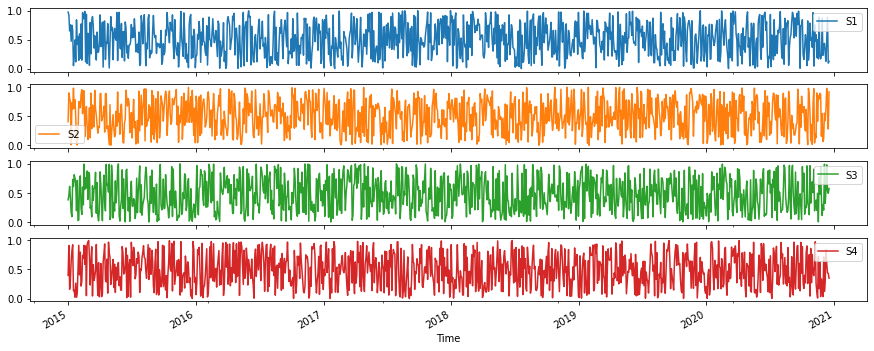

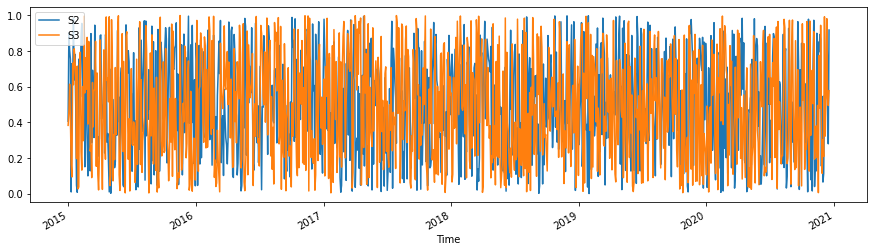

In [ ]:
Cdata.plot(subplots=True, figsize=(15,6))
Cdata.plot(y=["S2", "S3"], figsize=(15,4))

Both the S2 and S3 values are likely overlapping each other with some difference. 

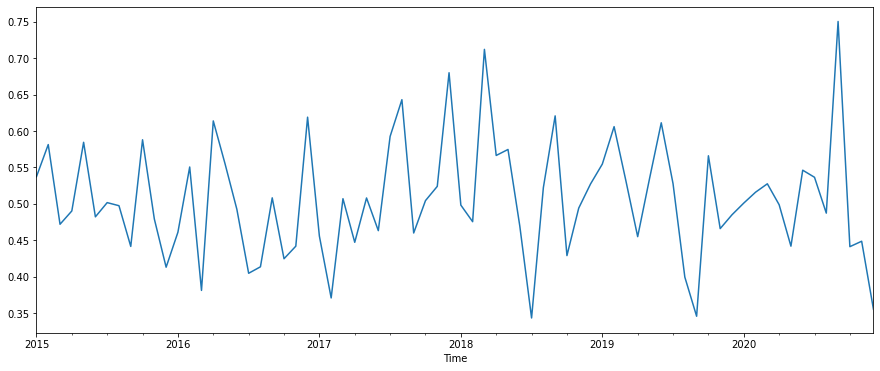

In [ ]:
y = Cdata['S1'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

The value of S2 data, increased in the time period 2018 but again there was dip in the mideele of the 2018. There after it took incresing path with again keep dip in end of the 2019. But during the middle of the year 2020, there is maximum raise in the value. Again followed by the dip.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


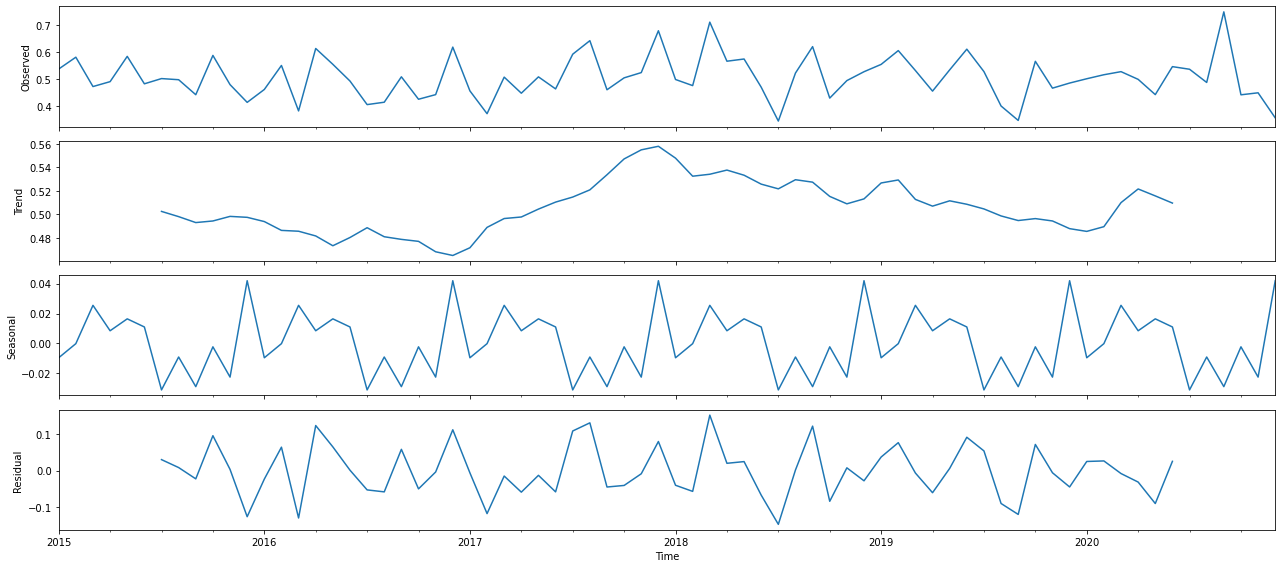

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

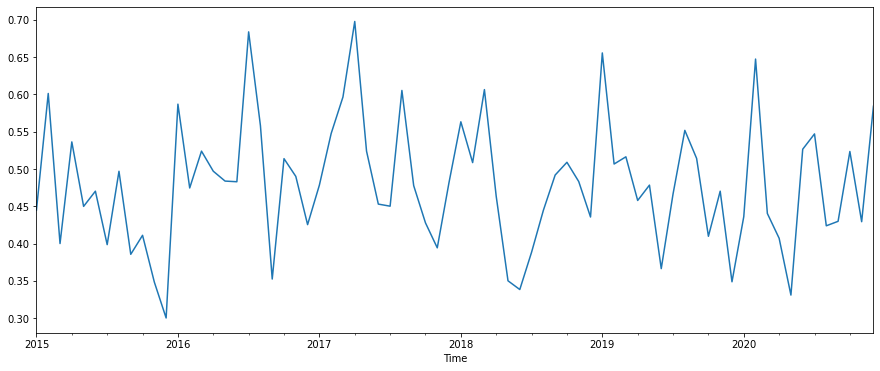

In [ ]:
z = Cdata['S3'].resample('MS').mean()
z.plot(figsize=(15, 6))
plt.show()

The value of S3 data, the values flutuated without following any particular pattern. But there was a dip at the end of the year 2015. But in early early 2016 there was rise in the rate. Then it was bit constant for the period till last quarter of 2016 followed by dip. The maximum value was reached during the First quarter year of 2017. 

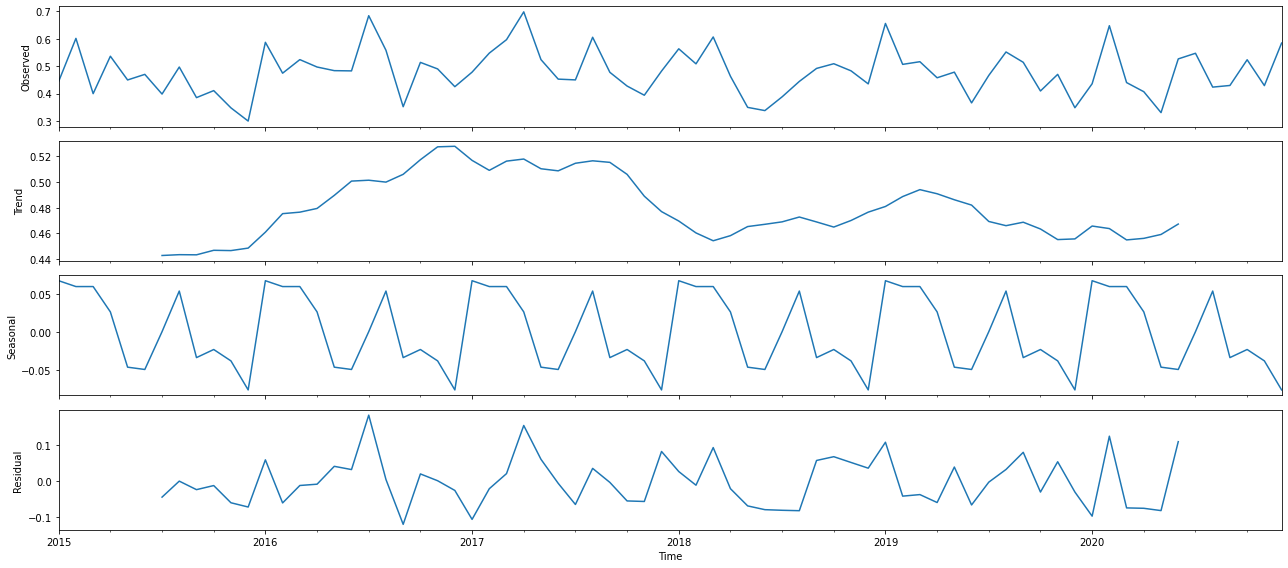

In [ ]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(z, model='additive')
fig = decomposition.plot()
plt.show()

<H3><B>INFERENCE:</B><BR>

From the heatmap which depicts the correlation, I found the following results-

The <b>S1</b> is negatively correlated to S2, and weakly correlated to S3. But is normally correlated to S4.

The <b>S2</b> is negatively correlated to S1 and S4. But it is positively correlated to S3.

The <b>S3</b> is positively is correlated to S1,S2,S4. But it is strongly correlated to S2. 

The <b>S4</b> is negatively correlated to S2. But it is positively correlated to S1 and S3. 

From the aove correlation, we can say that the correlation between S2 and S3 is high compare with its correlation with others. So, lets perform time series analysis between S2 and S3. 

<BR>
From the histogram and kde kind plot, I got the following results-

The S1 is normally distributed.

The S2 is right skewed.

The S3 is left skewed.

<br>
From the normal line plots we can roughly say that both S2 and S3 are distributed similarly, but we cannot trust on the visualization. Because based on the distribution plot, we got the S2 is skwewed right whereas the S3 is skewed left.

<br>
From the merged data plot both the S2 and S3 values are likely overlapping each other with some difference. 

<br>
The value of S2 data, increased in the time period 2018 but again there was dip in the mideele of the 2018. There after it took incresing path with again keep dip in end of the 2019. But during the middle of the year 2020, there is maximum raise in the value. Again followed by the dip.

<br>
The value of S3 data, the values flutuated without following any particular pattern. But there was a dip at the end of the year 2015. But in early early 2016 there was rise in the rate. Then it was bit constant for the period till last quarter of 2016 followed by dip. The maximum value was reached during the First quarter year of 2017. 

